# Analyze and predict GDP of Canada

In [1]:
import wbdata
import pandas as pd
import pycountry
import wbdata
import datetime
import matplotlib.pyplot as plt

 

countries = ["CAN"]

indicators1 = { 
               'BX.KLT.DINV.WD.GD.ZS': 'FDI net inflows', 
               'BM.KLT.DINV.WD.GD.ZS':'FDI net outflows', 
              'SH.XPD.GHED.GD.ZS': 'Domestic health expenditure',
              'GC.XPN.TOTL.GD.ZS': 'Expense on Goods & Services',
              'NE.CON.TOTL.ZS': 'Final consumption expenditure',
                'NV.AGR.TOTL.ZS' : 'Agriculture,forestry,fishing',
               #'SE.ADT.LITR.ZS' : 'Literacy rate',
             'SE.XPD.TOTL.GD.ZS' : 'Edu Exp',
           'GB.XPD.RSDV.GD.ZS' : 'Research and development expenditure'
              }

data_date = (datetime.datetime(1970, 1, 1), datetime.datetime(2015, 1, 1))
 
 
df1 = wbdata.get_dataframe(indicators1, country=countries, data_date=data_date ,convert_date=False)


In [2]:
df1.insert(0, "Country code","CAN")
df1

,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure
date,,,,,,,,,
2015,CAN,3.862851,5.403686,7.841788,17.099425,78.869660,1.711327,NaN,1.69718
2014,CAN,3.562327,3.607023,7.489032,16.440925,76.243154,1.424796,NaN,1.71824
2013,CAN,3.638827,2.956791,7.621551,17.127353,76.855779,1.725294,NaN,1.70964
2012,CAN,2.706682,3.412806,7.710853,17.559776,77.264089,1.647294,NaN,1.77660
2011,CAN,2.142835,2.799932,7.704585,17.892031,77.228884,1.605664,5.27444,1.79132
2010,CAN,1.841584,2.252274,7.881727,19.129659,78.658662,1.331664,5.36993,1.82958
2009,CAN,1.527991,2.752361,7.937452,18.901915,79.738925,1.375940,4.85264,1.92227
2008,CAN,4.526383,5.725053,7.074024,17.125843,74.365533,1.597655,4.63826,1.86040
2007,CAN,8.222072,4.446573,6.937547,17.007280,74.172753,1.407026,4.78036,1.90857


In [3]:
df1.reset_index(inplace = True)

In [4]:
df1['Research and development expenditure']= df1['Research and development expenditure'].interpolate(method = 'polynomial', order = 2)
df1['Research and development expenditure'] = df1['Research and development expenditure'].interpolate(method = 'pad')
df1['Domestic health expenditure'] = df1['Domestic health expenditure'].interpolate(method = 'pad')
df1['Agriculture,forestry,fishing'] = df1['Agriculture,forestry,fishing'].interpolate(method = 'pad')
df1['Edu Exp'] = df1['Edu Exp'].interpolate(method = 'polynomial', order = 2)
df1['Edu Exp'] = df1['Edu Exp'].interpolate(method = 'pad')
df1['Expense on Goods & Services'] = df1['Expense on Goods & Services'].interpolate(method = 'pad')
df1

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure
0,2015,CAN,3.862851,5.403686,7.841788,17.099425,78.869660,1.711327,NaN,1.69718
1,2014,CAN,3.562327,3.607023,7.489032,16.440925,76.243154,1.424796,NaN,1.71824
2,2013,CAN,3.638827,2.956791,7.621551,17.127353,76.855779,1.725294,NaN,1.70964
3,2012,CAN,2.706682,3.412806,7.710853,17.559776,77.264089,1.647294,NaN,1.77660
4,2011,CAN,2.142835,2.799932,7.704585,17.892031,77.228884,1.605664,5.274440,1.79132
5,2010,CAN,1.841584,2.252274,7.881727,19.129659,78.658662,1.331664,5.369930,1.82958
6,2009,CAN,1.527991,2.752361,7.937452,18.901915,79.738925,1.375940,4.852640,1.92227
7,2008,CAN,4.526383,5.725053,7.074024,17.125843,74.365533,1.597655,4.638260,1.86040
8,2007,CAN,8.222072,4.446573,6.937547,17.007280,74.172753,1.407026,4.780360,1.90857
9,2006,CAN,4.888366,3.827862,6.845635,17.077523,73.883382,1.498452,4.805076,1.94872


In [5]:
#grab indicators above for countires above and load into data frame
#df = wbdata.get_dataframe(indicators, country=countries, data_date=data_date ,convert_date=False)

data_date = (datetime.datetime(1972, 1, 1), datetime.datetime(2017, 1, 1))
indicators2 = {'NY.GDP.PCAP.CD': 'GDP per Capita after 2 years'}
              


In [6]:
#grab indicators above for countires above and load into data frame
df2 = wbdata.get_dataframe(indicators2, country=countries, data_date=data_date ,convert_date=False)

In [7]:
df2

,GDP per Capita after 2 years
date,
2017,45069.927254
2016,42279.900823
2015,43495.054387
2014,50835.511178
2013,52504.655704
2012,52542.346665
2011,52101.796086
2010,47450.318470
2009,40773.061529


In [8]:
df2.reset_index(inplace = True)

In [9]:
df2 = df2.drop(['date'],axis = 1)

In [10]:
df2

,GDP per Capita after 2 years
0,45069.927254
1,42279.900823
2,43495.054387
3,50835.511178
4,52504.655704
5,52542.346665
6,52101.796086
7,47450.318470
8,40773.061529
9,46594.450954


In [11]:
df_joined = pd.merge(df1,df2,left_index=True, right_index=True)
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure,GDP per Capita after 2 years
0,2015,CAN,3.862851,5.403686,7.841788,17.099425,78.869660,1.711327,NaN,1.69718,45069.927254
1,2014,CAN,3.562327,3.607023,7.489032,16.440925,76.243154,1.424796,NaN,1.71824,42279.900823
2,2013,CAN,3.638827,2.956791,7.621551,17.127353,76.855779,1.725294,NaN,1.70964,43495.054387
3,2012,CAN,2.706682,3.412806,7.710853,17.559776,77.264089,1.647294,NaN,1.77660,50835.511178
4,2011,CAN,2.142835,2.799932,7.704585,17.892031,77.228884,1.605664,5.274440,1.79132,52504.655704
5,2010,CAN,1.841584,2.252274,7.881727,19.129659,78.658662,1.331664,5.369930,1.82958,52542.346665
6,2009,CAN,1.527991,2.752361,7.937452,18.901915,79.738925,1.375940,4.852640,1.92227,52101.796086
7,2008,CAN,4.526383,5.725053,7.074024,17.125843,74.365533,1.597655,4.638260,1.86040,47450.318470
8,2007,CAN,8.222072,4.446573,6.937547,17.007280,74.172753,1.407026,4.780360,1.90857,40773.061529
9,2006,CAN,4.888366,3.827862,6.845635,17.077523,73.883382,1.498452,4.805076,1.94872,46594.450954


In [12]:
# Normalizing the data in the rings column beacuse the value is too high when compared to independent variable

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']] = pd.DataFrame(x_scaled)

In [13]:
df_joined.corr()

,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure,GDP per Capita after 2 years
FDI net inflows,1.000000,0.696752,0.250782,-0.564634,-0.421245,-0.399440,-0.417116,0.431062,0.324407
FDI net outflows,0.696752,1.000000,0.464573,-0.818697,-0.373609,-0.426084,-0.771393,0.676552,0.646945
Domestic health expenditure,0.250782,0.464573,1.000000,-0.770884,0.005230,-0.861375,-0.633632,0.526257,0.886477
Expense on Goods & Services,-0.564634,-0.818697,-0.770884,1.000000,0.402217,0.721868,0.896086,-0.830292,-0.871136
Final consumption expenditure,-0.421245,-0.373609,0.005230,0.402217,1.000000,0.112212,0.469880,-0.427656,-0.102900
"Agriculture,forestry,fishing",-0.399440,-0.426084,-0.861375,0.721868,0.112212,1.000000,0.622339,-0.588012,-0.824626
Edu Exp,-0.417116,-0.771393,-0.633632,0.896086,0.469880,0.622339,1.000000,-0.840588,-0.849533
Research and development expenditure,0.431062,0.676552,0.526257,-0.830292,-0.427656,-0.588012,-0.840588,1.000000,0.727810
GDP per Capita after 2 years,0.324407,0.646945,0.886477,-0.871136,-0.102900,-0.824626,-0.849533,0.727810,1.000000


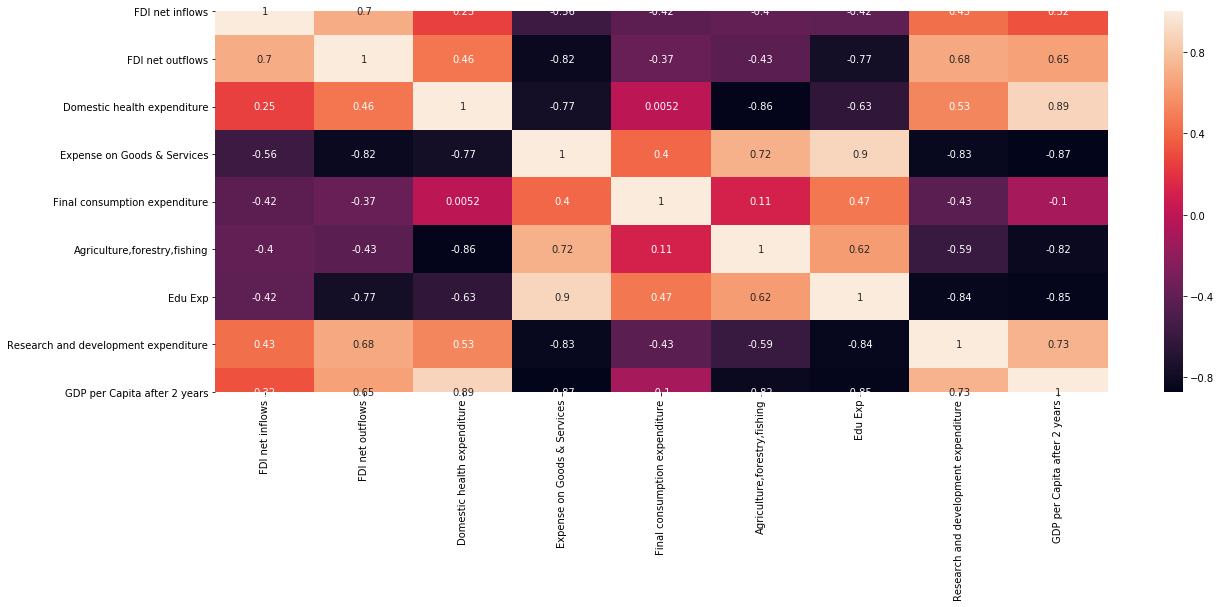

In [14]:
import seaborn as sns
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_joined.corr(), annot=True)

In [15]:
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure,GDP per Capita after 2 years
0,2015,CAN,0.417983,0.858230,0.949874,0.071739,0.596381,0.601034,NaN,0.204435,0.842529
1,2014,CAN,0.385221,0.569085,0.765039,0.000000,0.298152,0.147434,NaN,0.255033,0.783733
2,2013,CAN,0.393561,0.464440,0.834475,0.074782,0.367713,0.623144,NaN,0.234371,0.809341
3,2012,CAN,0.291942,0.537829,0.881268,0.121892,0.414075,0.499664,NaN,0.395248,0.964031
4,2011,CAN,0.230473,0.439196,0.877983,0.158089,0.410078,0.433762,5.274440,0.430614,0.999206
5,2010,CAN,0.197632,0.351059,0.970801,0.292920,0.572423,0.000000,5.369930,0.522536,1.000000
6,2009,CAN,0.163445,0.431540,1.000000,0.268109,0.695082,0.070092,4.852640,0.745231,0.990716
7,2008,CAN,0.490319,0.909949,0.547584,0.074617,0.084957,0.421082,4.638260,0.596584,0.892693
8,2007,CAN,0.893211,0.704197,0.476074,0.061701,0.063067,0.119303,4.780360,0.712316,0.751979
9,2006,CAN,0.529781,0.604625,0.427914,0.069353,0.030210,0.264037,4.805076,0.808779,0.874656


In [16]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(df_joined['GDP per Capita after 2 years'], df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services', 'Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]).fit()

# Print out the statistic
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     GDP per Capita after 2 years   R-squared (uncentered):                   0.964
Model:                                      OLS   Adj. R-squared (uncentered):              0.958
Method:                           Least Squares   F-statistic:                              150.8
Date:                          Wed, 22 Apr 2020   Prob (F-statistic):                    3.29e-26
Time:                                  23:56:03   Log-Likelihood:                          41.658
No. Observations:                            46   AIC:                                     -69.32
Df Residuals:                                39   BIC:                                     -56.52
Df Model:                                     7                                                  
Covariance Type:                      nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
FDI net inflows                         -0.1501      0.120     -1.250      0.219      -0.393       0.093
FDI net outflows                         0.3897      0.137      2.854      0.007       0.114       0.666
Domestic health expenditure              0.6448      0.075      8.654      0.000       0.494       0.796
Expense on Goods & Services              0.1637      0.120      1.363      0.181      -0.079       0.407
Final consumption expenditure            0.1021      0.092      1.107      0.275      -0.085       0.289
Agriculture,forestry,fishing            -0.0270      0.103     -0.261      0.795      -0.236       0.182
Research and development expenditure     0.3260      0.072      4.524      0.000       0.180       0.472
==============================================================================
Omnibus:                        0.220   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.420
Skew:                          -0.048   Prob(JB):                        0.810
Kurtosis:                       2.542   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

Considering the significance value of 0.05.

1. The **FDI net inflows** has the p-value 0.953, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
2.  The **FDI net outflows** has the p-value 0.903, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
2. The **Domestic health expenditure** has the p-value 	0.008, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
3. The **Expense on Goods & Services** has the p-value 0.225, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
4. The **Final consumption expenditure** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
5. The **Agriculture,forestry,fishing** has the p-value 0.001, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
6. The **Education expenditure** has the p-value 0.681, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
7. The **Research and development expenditure** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.

### Train, test and validation split

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [17]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','Domestic health expenditure','Final consumption expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

### Linear Regression

In [18]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [20]:
#training Data
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))

Coefficients: 
 [ 0.07088395  0.79673944 -0.20025173]
Mean squared error: 0.02
Coefficient of determination: 0.82


In [21]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))

Coefficients: 
 [ 0.07088395  0.79673944 -0.20025173]
Mean squared error: 0.02
Coefficient of determination: 0.72


In [22]:
y_pred

array([0.13868993, 0.27230256, 0.26751234, 0.52952206, 0.32557259,
       0.78403366, 0.25648634])

In [23]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
regr.score(X_test, y_test)

0.6895591183960403

Text(0, 0.5, 'Predictions')

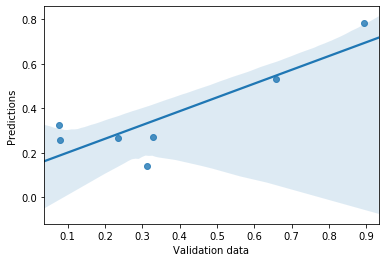

In [24]:
## The line / model
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(y_test, y_pred)
sns.regplot(y_val,y_pred)
plt.xlabel('Validation data')
plt.ylabel('Predictions')

## Random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

-0.00033351581062568414

In [27]:
print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for test data',r2_score(y_test, random_model.predict(X_test)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on test set',np.sqrt(mean_squared_error(y_test,random_model.predict(X_test))))


R2 score for training data -0.00033351581062568414
R2 score for test data -0.06341427233743757
Root mean square error score on training set 0.3060132282773789
Root mean square error score on test set 0.34238228279303273


Data is underfitting so using hyperparameters

In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   32.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [30]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [31]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =2000,
 min_samples_split = 2,
 min_samples_leaf = 2,
 max_features= 'auto',
 max_depth = 90,
 bootstrap = True)
random_model.fit(X_train, y_train)
print('Training score is',r2_score(y_train, random_model.predict(X_train)))

Training score is 0.9704618853601622


In [32]:
print('Testing score is ',r2_score(y_test, random_model.predict(X_test)))

rmse = np.sqrt(mean_squared_error(y_test,random_model.predict(X_test)))
print('Root mean square error is',rmse)

Testing score is  0.735000674232672
Root mean square error is 0.17091588389059673


### Artifical Neural Network

In [33]:
train_dataset = df_joined.sample(frac=0.8,random_state=0)
test_dataset = df_joined.drop(train_dataset.index)

In [34]:
train_dataset = train_dataset.drop('Country code',axis =1)
train_dataset = train_dataset.drop('date',axis =1)

In [35]:
test_dataset = test_dataset.drop('Country code',axis =1)
test_dataset = test_dataset.drop('date',axis =1)

C:\Users\prana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\prana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


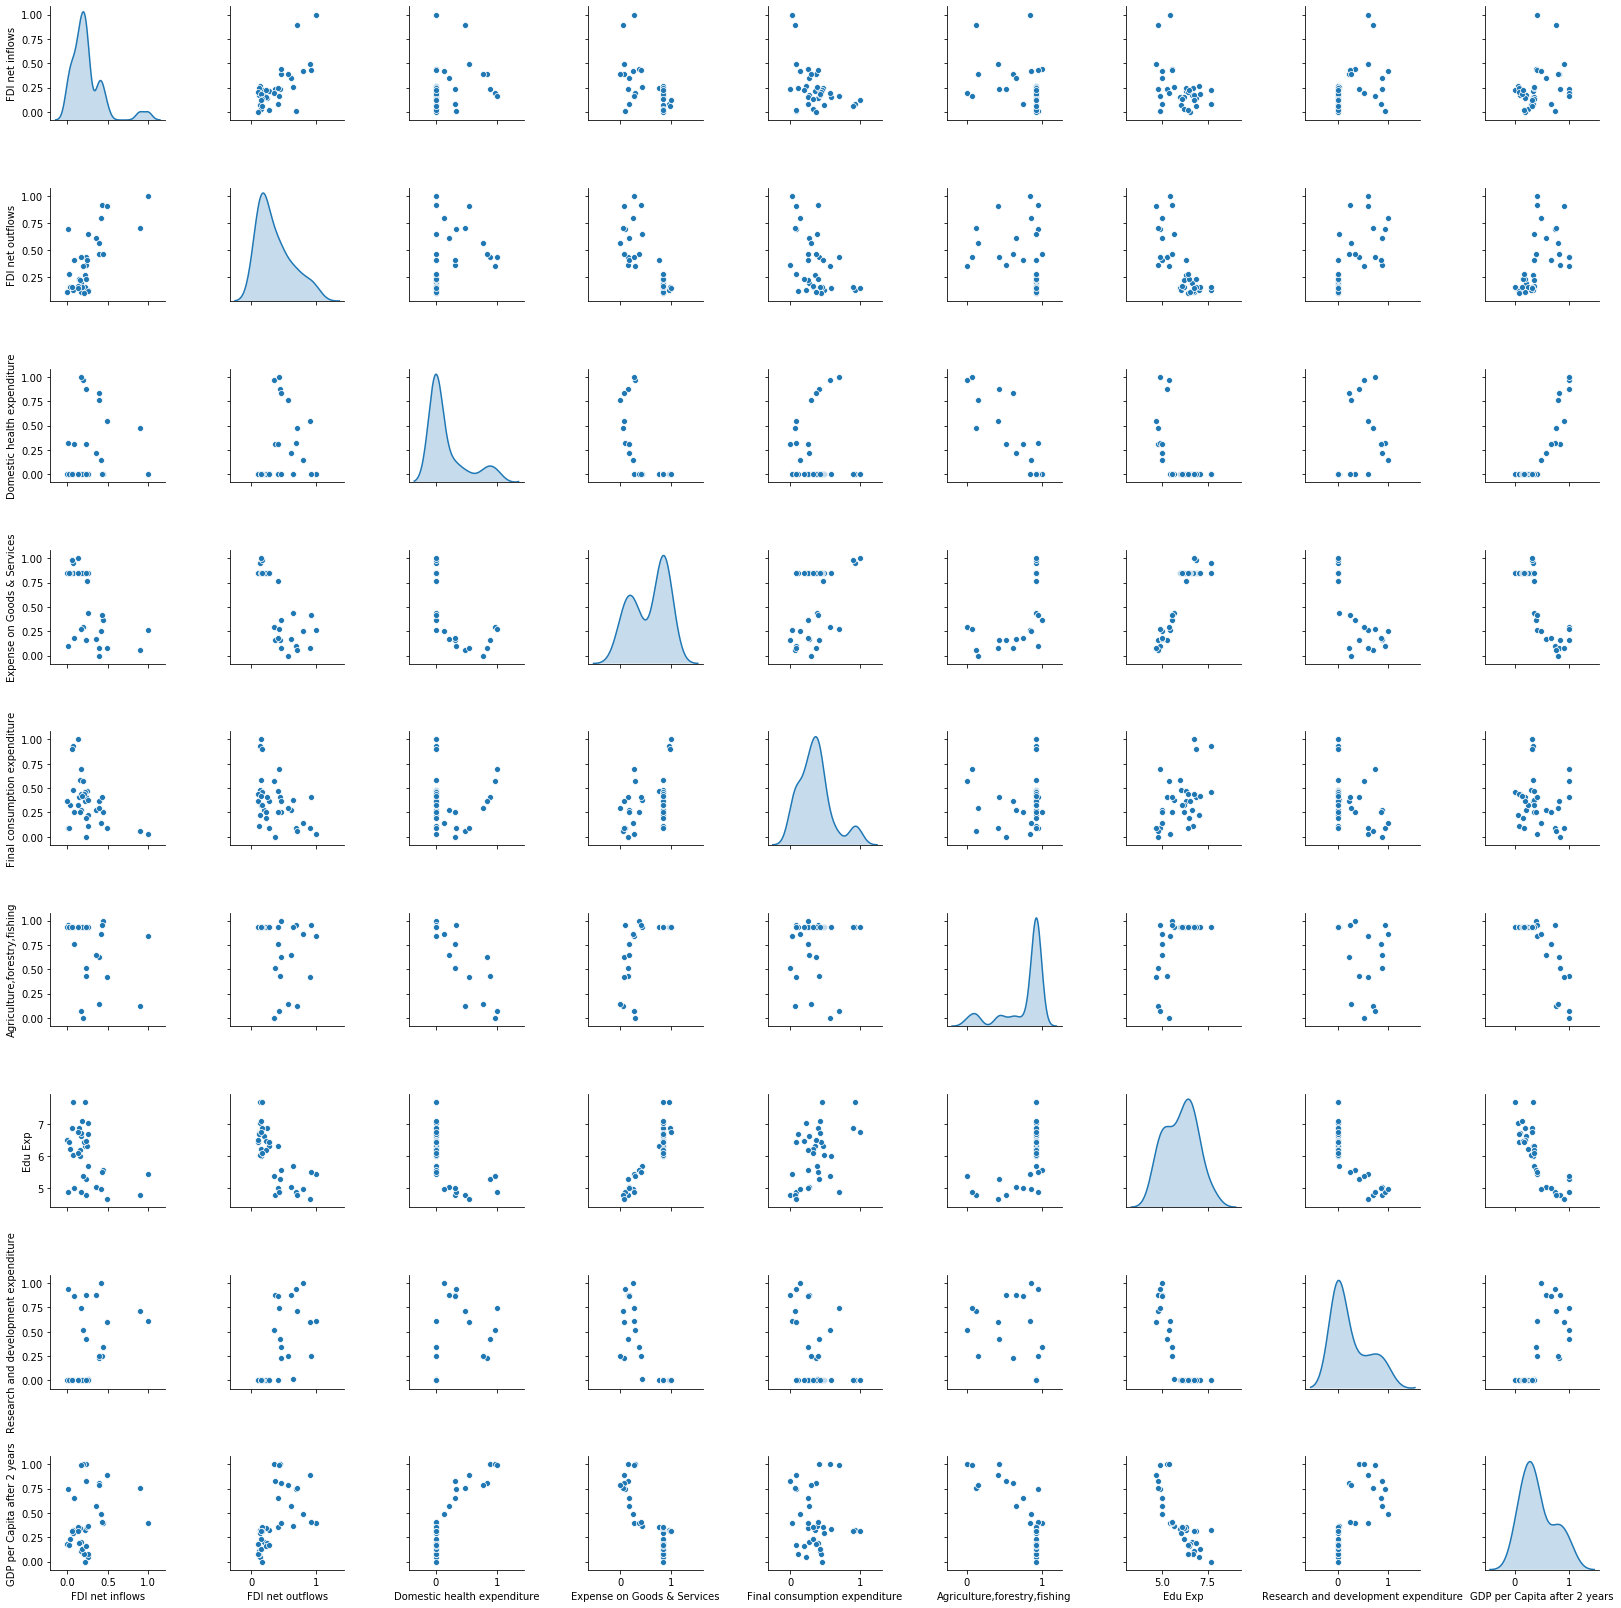

In [36]:
sns.pairplot(train_dataset, diag_kind="kde")

In [37]:
train_stats = train_dataset.describe()
train_stats.pop("GDP per Capita after 2 years")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
FDI net inflows,37.0,0.245853,0.211617,0.000000,0.135231,0.209226,0.261235,1.00000
FDI net outflows,37.0,0.366445,0.260563,0.104264,0.154681,0.272284,0.464440,1.00000
Domestic health expenditure,37.0,0.182948,0.318158,0.000000,0.000000,0.000000,0.306481,1.00000
Expense on Goods & Services,37.0,0.576376,0.342034,0.000000,0.254513,0.843929,0.843929,1.00000
Final consumption expenditure,37.0,0.361859,0.239021,0.000000,0.222250,0.363977,0.441210,1.00000
"Agriculture,forestry,fishing",37.0,0.778776,0.284903,0.000000,0.757273,0.929998,0.929998,1.00000
Edu Exp,35.0,6.026358,0.859320,4.638260,5.322185,6.176150,6.666835,7.71019
Research and development expenditure,37.0,0.251059,0.349980,0.000000,0.000000,0.000000,0.522536,1.00000


In [38]:
train_labels = train_dataset.pop('GDP per Capita after 2 years')
test_labels = test_dataset.pop('GDP per Capita after 2 years')

In [39]:
test_dataset = test_dataset.drop('Edu Exp', axis = 1)
train_dataset = train_dataset.drop('Edu Exp', axis = 1)

In [40]:
def norm(a):
    return (a - train_stats['mean']) / train_stats['std']


In [41]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [42]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.layers import Input, Dense

In [43]:

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [44]:
model = build_model()

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [49]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

ValueError: Error when checking input: expected dense_input to have shape (7,) but got array with shape (8,)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
earlystopper = EarlyStopping(patience=3, verbose=1)

filepath = "model.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

 

callbacks_list = [earlystopper, checkpoint]

In [ ]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=callbacks_list)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:

print(history.history.keys())

In [ ]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize h

In [ ]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize h

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop])

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
print ("linear regression test score:", test_score)
print('Random forest testing score is ',r2_score(y_test, random_model.predict(X_test)))
print("ANN testing score is", (1 - loss))